In [1]:
from child import Child
import helper_functions

In [2]:
# Step 0: Read config file
config_file_path = 'phasing_config_file.txt'
with open(config_file_path, 'r') as f:
    config_elem = [line.strip().split('\t')[1] for line in f]
    
#print(config_elem)

In [3]:
# Step 1: Obtain names from ped file
names = helper_functions.ped_file_reader(config_elem[0])

In [4]:
print(names)

['UDP18144', 'UDP18145', 'UDP18111', 'UDP18143', 'UDP18142']


In [5]:
# Step 2: Read in the vcf file and get only SNP list
df = helper_functions.read_VCF(config_elem[1], names)

C:\Users\rodriguezah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
df.tail()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UDP18111,UDP18142,UDP18143,UDP18144,UDP18145
6602304,MT,16270,.,C,T,NaN,.,DP=15153;MQ=58.10,GT:AD:AF:DP:FT:LOD:F1R2:F2R1:PS,"0/0:3405,92:0.026:2712:PASS:.:.:.:.","0/0:4358,128:0.029:3388:PASS:.:.:.:.","0/0:3950,86:0.021:3448:PASS:.:.:.:.","0|1:0,2580:1.000:2580:PASS:10097.59:0,1201:0,1...","0/0:3265,43:0.013:2636:PASS:.:.:.:."
6602305,MT,16291,.,C,T,NaN,.,DP=15104;MQ=59.07,GT:AD:AF:DP:FT:LOD:F1R2:F2R1:PS,"0/0:3405,92:0.026:2712:PASS:.:.:.:.","0/0:4358,128:0.029:3388:PASS:.:.:.:.","0/0:3950,86:0.021:3448:PASS:.:.:.:.","0/0:2326,202:0.080:2528:LowGQ:.:.:.:.","0|1:2335,7:0.003:2342:PASS:8.61:1141,3:1194,4:..."
6602306,MT,16293,.,A,G,NaN,.,DP=14775;MQ=58.49,GT:AD:AF:DP:FT:LOD:F1R2:F2R1,"0/0:3405,92:0.026:2712:PASS:.:.:.","0/0:4358,128:0.029:3388:PASS:.:.:.","0/0:3950,86:0.021:3448:PASS:.:.:.","0/1:2195,6:0.003:2201:PASS:6.68:1051,5:1144,1","0/0:2516,138:0.052:2596:PASS:.:.:."
6602307,MT,16298,.,T,C,NaN,.,DP=15734;MQ=59.22,GT:AD:AF:DP:FT:LOD:F1R2:F2R1:PS,"0/1:2,2262:0.999:2264:PASS:9173.87:1,1097:1,11...","0/1:7,3022:0.998:3029:PASS:12235.42:5,1537:2,1...","0/1:3,3116:0.999:3119:PASS:12601.79:2,1560:1,1...","0/0:2215,234:0.096:2449:LowGQ:.:.:.:.","0|1:2,2287:0.999:2289:PASS:9290.33:0,1111:2,11..."
6602308,MT,16365,.,C,T,NaN,.,DP=13671;MQ=58.38,GT:AD:AF:DP:FT:LOD:F1R2:F2R1,"0/0:2451,178:0.068:2618:PASS:.:.:.","0/0:3010,201:0.063:3199:PASS:.:.:.","0/0:3057,220:0.067:3267:PASS:.:.:.","0/1:1827,4:0.002:1831:lod_fstar:4.38:845,3:982,1","0/0:2145,131:0.058:2261:PASS:.:.:."


In [7]:
# Step 3: Filter by specific chromosome and chromosome quality
chr7_df = helper_functions.filter_VCF_by_chr_and_SNP(df, 7)

In [8]:
chr7_df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UDP18111,UDP18142,UDP18143,UDP18144,UDP18145
0,7,10116,.,A,C,114.47,.,AC=2;AF=0.500;AN=4;DP=1528;FS=1.263;MQ=11.20;M...,GT:AD:AF:DP:GQ:FT:F1R2:F2R1:PL:GP,"./.:219,123:0.360:341:0:LowGQ:.:.","./.:177,144:0.449:321:0:LowGQ:.:.","./.:220,30:0.120:249:0:LowGQ:.:.","0/0:311,94:0.232:405:0:LowGQ:.:.:0,0,2089:.","1/1:13,71:0.845:84:81:PASS:10,51:3,20:154,84,0..."
1,7,11069,.,T,C,116.05,.,AC=5;AF=0.500;AN=10;DP=62;FS=7.945;MQ=9.66;MQR...,GT:AD:AF:DP:GQ:FT:F1R2:F2R1:PL:GP:PS,"0/1:10,4:0.286:14:9:DRAGENSnpHardQUAL:5,4:5,0:...","0/0:4,2:0.333:6:0:LowGQ:.:.:0,0,72:.:.","1/1:2,10:0.833:12:3:PASS:1,4:1,6:53,3,0:1.8278...","0/1:13,6:0.316:19:9:DRAGENSnpHardQUAL:6,3:7,3:...","1|0:9,2:0.182:11:17:DRAGENSnpHardQUAL:3,2:6,0:..."
2,7,11511,.,G,C,175.10,.,AC=7;AF=0.700;AN=10;DP=20;FS=0.000;MQ=6.98;MQR...,GT:AD:AF:DP:GQ:FT:F1R2:F2R1:PL:GP,"1/1:0,6:1.000:6:12:PASS:0,3:0,3:53,18,0:1.5861...","0/1:1,2:0.667:3:3:DRAGENSnpHardQUAL:1,2:0,0:33...","1/1:0,4:1.000:4:9:PASS:0,2:0,2:61,12,0:2.4158e...","0/1:3,2:0.400:5:3:DRAGENSnpHardQUAL:1,1:2,1:35...","0/1:1,1:0.500:2:4:DRAGENSnpHardQUAL:1,0:0,1:33..."
3,7,11727,.,C,T,243.73,.,AC=6;AF=0.600;AN=10;DP=49;FS=0.000;MQ=13.14;MQ...,GT:AD:AF:DP:GQ:FT:F1R2:F2R1:PL:GP,"1/1:0,11:1.000:11:30:PASS:0,7:0,4:94,33,0:5.66...","1/1:1,14:0.933:15:26:PASS:1,6:0,8:96,29,0:5.81...","0/1:3,11:0.786:14:6:PASS:2,5:1,6:50,0,1:1.6432...","0/0:4,0:0.000:2:0:LowGQ:.:.:0,0,27:.","0/1:4,3:0.429:7:11:PASS:2,2:2,1:47,0,12:1.2205..."
4,7,12362,.,T,G,384.88,.,AC=10;AF=1.000;AN=10;DP=52;FS=0.000;MQ=14.44;M...,GT:AD:AF:DP:GQ:FT:F1R2:F2R1:PL:GP,"1/1:0,17:1.000:17:48:PASS:0,10:0,7:112,51,0:7....","1/1:0,16:1.000:16:45:PASS:0,8:0,8:110,48,0:7.2...","1/1:0,12:1.000:12:33:PASS:0,8:0,4:98,36,0:6.01...","1/1:0,2:1.000:2:5:PASS:0,1:0,1:53,6,0:1.6868e+...","1/1:1,3:0.750:4:3:PASS:1,2:0,1:49,3,0:1.4260e+..."


In [9]:
# Step 4: Create list of children
children = [Child(names[i], names[0], names[1]) for i in range(2, len(names))]

In [10]:
# Step 5: Generate phasable SNP data for each child
for elem in children:
    elem.phasable_snp_determiner(chr7_df)

In [11]:
print(children[0].name)
print(len(children[0].pos_arr))
print(children[0].dad_rd_array.size)
print(children[0].mom_rd_array.size)

UDP18111
107148
107148
107148


In [30]:
# Step 6: Do sliding t-test for each child and see if possible mosaicism present
for elem in children:
    elem.t_test_snps(10000)

In [31]:
for elem in children:
    print(elem.vcf_pos_start_of_mosaicism)

0
1175686
0


In [32]:
# Step 7: Check if a child is mosaic
mosaic_child_present = False
for elem in children:
    if elem.vcf_pos_start_of_mosaicism != 0:
        mosaic_child_present = True
        elem.edge_detection(50, 100, 0.5)

# if all clear, print out
if not mosaic_child_present:
    print("No child is mosaic")
else:
    print("A child is mosaic")

The minimum sum value for left border is 398.0
A child is mosaic


In [40]:
import matplotlib.pyplot as plt
from scipy.stats import t
%matplotlib inline

Text(0, 0.5, 't-values')

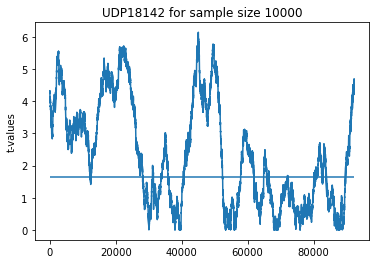

In [51]:
# Plot the t-values for UDP112828
plt.plot(children[2].t_values)
plt.hlines(t.ppf(0.95, 10000-1).item(), 0, len(children[2].t_values))
plt.title(children[2].name + " for sample size 10000")
plt.ylabel('t-values')